In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump

#Load the data and carry out initial exploration

In [ ]:
# load csv in a dataframe
df_ahmed = pd.read_csv('titanic_midterm_comp247.csv')

In [ ]:
# read first 5 rows of dataset
df_ahmed.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0


#Preprocess the Dataset: Clean Data: Find & Mark Missing Values

In [ ]:
# Check if any attribute contains missing values
# count the number of NaN values in each column
print(df_ahmed.isnull().sum().sort_values())

pclass        0
sex           0
sibsp         0
parch         0
survived      0
fare          1
embarked      2
age         263
dtype: int64


In [ ]:
# print info of dataframe
df_ahmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
 6   embarked  1307 non-null   object 
 7   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [ ]:
# summary of dataframe
df_ahmed.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
#print datatypes of each variables
df_ahmed.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [ ]:
# print number of records in a dataframe
df_ahmed.size

10472

In [ ]:
# number of people survived in titanic
df_ahmed["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

#Summarize your findings in the below box, make sure to use your own words and give a full picture of the dataset.

I had find that we have 2 classes in our dataset 0 and 1. Total number of records in our dataset are 10472 in which 809 belongs to class 0 and 500 belongs to class 1. We have both categorical and numeric features in our dataset. After data analysis I had found that we have 263 missing values or null values in column age, fare also have 1 null value and
embarked also contain 2 null values. Our main aim is to predict whether a passengers will survived or not without the help on given features.

#Generate a pairplot showing the relationship between the all the columns, take a screenshot.

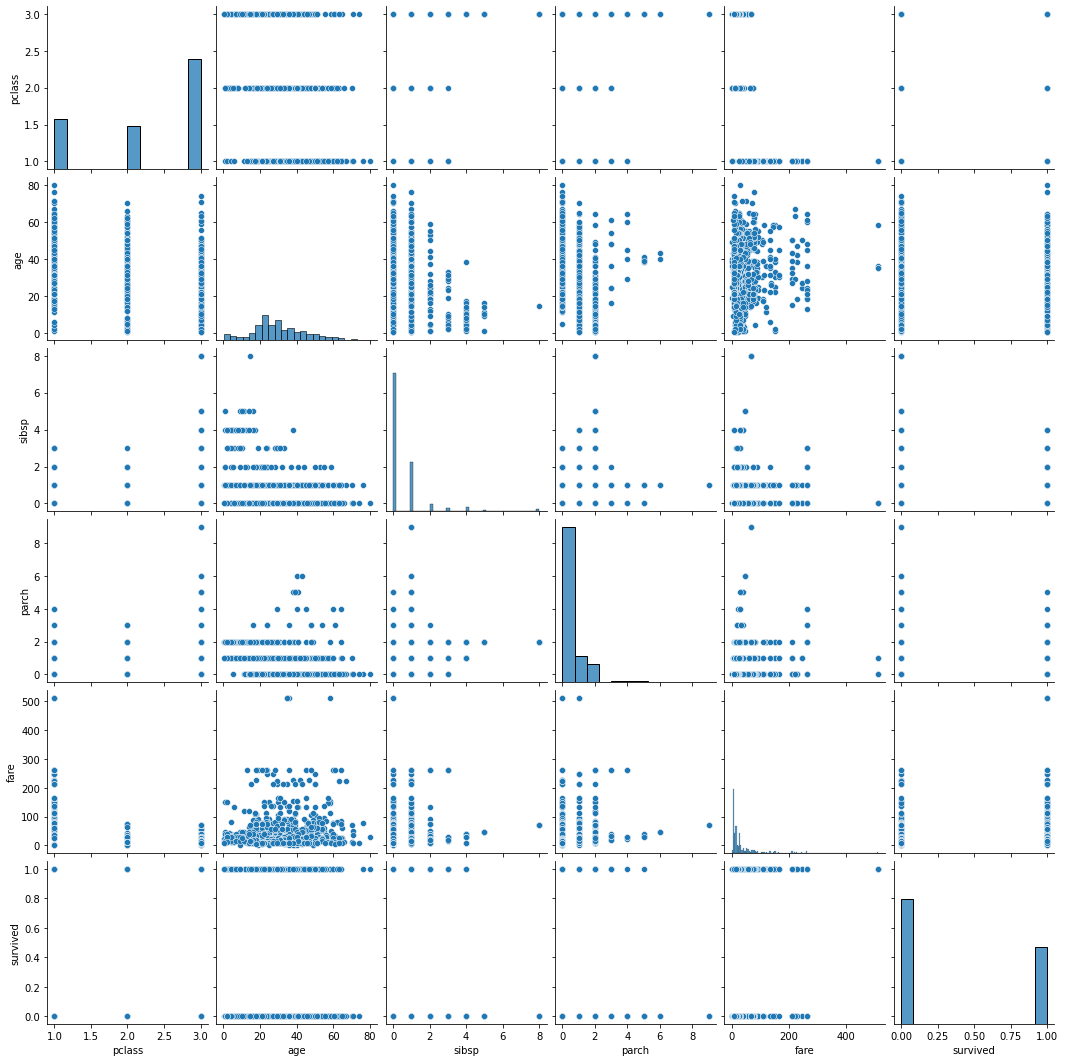

In [ ]:
#create pairplot of dataframe
sns.pairplot(df_ahmed)

#Prepare the data for machine learning

##Separate the features from the target class. Name the features dataframe df_firstname_features and name the target df_firstname_target.

In [ ]:
# Separate dataframe into input and output components by slicing
#attributes
df_ahmed_features = df_ahmed.drop(['survived'], axis=1)
#labels
df_ahmed_target = df_ahmed['survived']

##Split the data into 75% for training and 25% for testing, set the random seed to the last two digits of your student id.

In [ ]:
# Split the dataset --> training sub-dataset: 75%; test sub-dataset: 25%
# Selection of records to include in which sub-dataset must be done randomly
# Use this seed for randomization
# Split the dataset (both input & outout) into training/testing datasets
X_train, X_test, y_train, y_test = train_test_split(df_ahmed_features, df_ahmed_target, test_size=0.25, random_state=22)

##  Prepare a pipeline to handle the numeric data columns of the feature space. Name the pipeline num_pipeline_firstname. The pipeline should handle the following steps:
            Fill in all the missing values using the median value of each column.
            Apply the standard scalar.

In [ ]:
#create a pipeline to handle numeric data
num_pipeline_ahmed = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

##Prepare another pipeline to handle the all the categorical data of the feature space. Name the pipeline cat_pipeline_firstname. The pipeline should handle the following steps:
            Fill in all the missing values using the most frequently used value of each column.
            Apply one hot encoding for categorical data.

In [ ]:
#create a pipeline to handle categorical data
cat_pipeline_ahmed = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoder', OneHotEncoder())
])

##Prepare a ColumnTransformer pipeline that combines both the above pipelines and the respective feature columns. Name this pipeline full_pipeline_firstname.

In [ ]:
# column names of numeric and categorical columns
num_attribs = ['age', 'fare', 'sibsp', 'parch']
cat_attribs = ['sex', 'embarked', 'pclass']

#prepare a combine pipeline
full_pipeline_ahmed = ColumnTransformer([
    ('num', num_pipeline_ahmed, num_attribs),
    ('cat', cat_pipeline_ahmed, cat_attribs)
])

#Use the full pipeline you prepared in step 5 above to fit and transform your training data. Save the transformed data into a dataframe named X_train_transformed.

In [ ]:
#transform train data through pipeline
X_train_transformed = full_pipeline_ahmed.fit_transform(X_train)

#build the model

#Build one classifier of these:
            A logistic regression classifier
            A support vector machine classifier
        fit the X_train_transformed data with the respective labels to classifier model and generate the following:
            Use cross validation on the training and print out the scores.
            Print out the mean score.

#Logistic Regression Classifier

In [ ]:
# call model
log_reg_clf = LogisticRegression(random_state=22)
#Train the model using the training sets
log_reg_clf.fit(X_train_transformed,y_train)

# perform cross validation
log_reg_scores = cross_val_score(log_reg_clf, X_train_transformed, y_train, cv=5)

# print scores
print("Logistic Regression Scores:", log_reg_scores)
print("Mean Score:", np.mean(log_reg_scores))

Logistic Regression Scores: [0.7715736  0.81632653 0.78061224 0.79591837 0.78061224]
Mean Score: 0.7890085983632031


#Support Vector Machine Classifier

In [ ]:
# call model
svc_clf = SVC(random_state=22)
#Train the model using the training sets
svc_clf.fit(X_train_transformed,y_train)
# perform cross validation
svc_scores = cross_val_score(svc_clf, X_train_transformed, y_train, cv=5)
# print scores
print("SVC Scores:", svc_scores)
print("Mean Score:", np.mean(svc_scores))

SVC Scores: [0.81725888 0.84693878 0.81632653 0.83673469 0.81632653]
Mean Score: 0.8267170827721951


#Test and save the model                                         
        printout the accuracy score.
        Take a screenshot to show the results.
        Save both the best model and the full pipeline to the disk, and attach the objects to your submission. (Hint:  use joblib dump)

In [ ]:
# Test the model and print the accuracy score
# first we will tranform our test data
X_test_transformed = full_pipeline_ahmed.fit_transform(X_test)
# then use model.predict for model prediction
y_pred = svc_clf.predict(X_test_transformed)
# then compare actual class with predicted class to find accuracy
accuracy = accuracy_score(y_test, y_pred)
# print accuracy score
print(("Accuracy score: %.2f%%") % (accuracy*100.0))

Accuracy score: 76.52%
